#  Business case and Domain analysis

### The objective of this project is to Predication of bike rental count on daily based on the environmental and seasonal settings.
### Features:
instant: record index

dteday : date

season : season (1:winter, 2:spring, 3:summer, 4:fall)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from [Web Link])

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

Here, the output variable is "cnt".tal bikes including both casual and registered



In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load hour dataset
hour_data=pd.read_csv('hour.csv')
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Rename columns with meaningful name

In [5]:
hour_data.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hr':'hour',
                       'hum':'humidity','cnt':'count'},inplace=True)

# Some basic checks

In [6]:
#check the shape of the hour dataset
hour_data.shape


(17379, 17)

In [7]:
#check top 5 records
hour_data.head()

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

In [9]:
#check unique values for all the cols.
hour_data.apply(lambda x: len(x.unique()))

id                   17379
datetime               731
season                   4
year                     2
month                   12
hour                    24
holiday                  2
weekday                  7
workingday               2
weather_condition        4
temp                    50
atemp                   65
humidity                89
windspeed               30
casual                 322
registered             776
count                  869
dtype: int64

In [10]:
#For better visualization change int columns to category.
cols = ['season','month','hour','holiday','weekday','workingday','weather_condition']
for col in cols:
    
    hour_data[col]=hour_data[col].astype('category')


In [11]:
hour_data.describe()

,id,year,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Exploratory data analysis


In [12]:
#check Count of bikes during weekdays and weekends.
#using pointplot

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

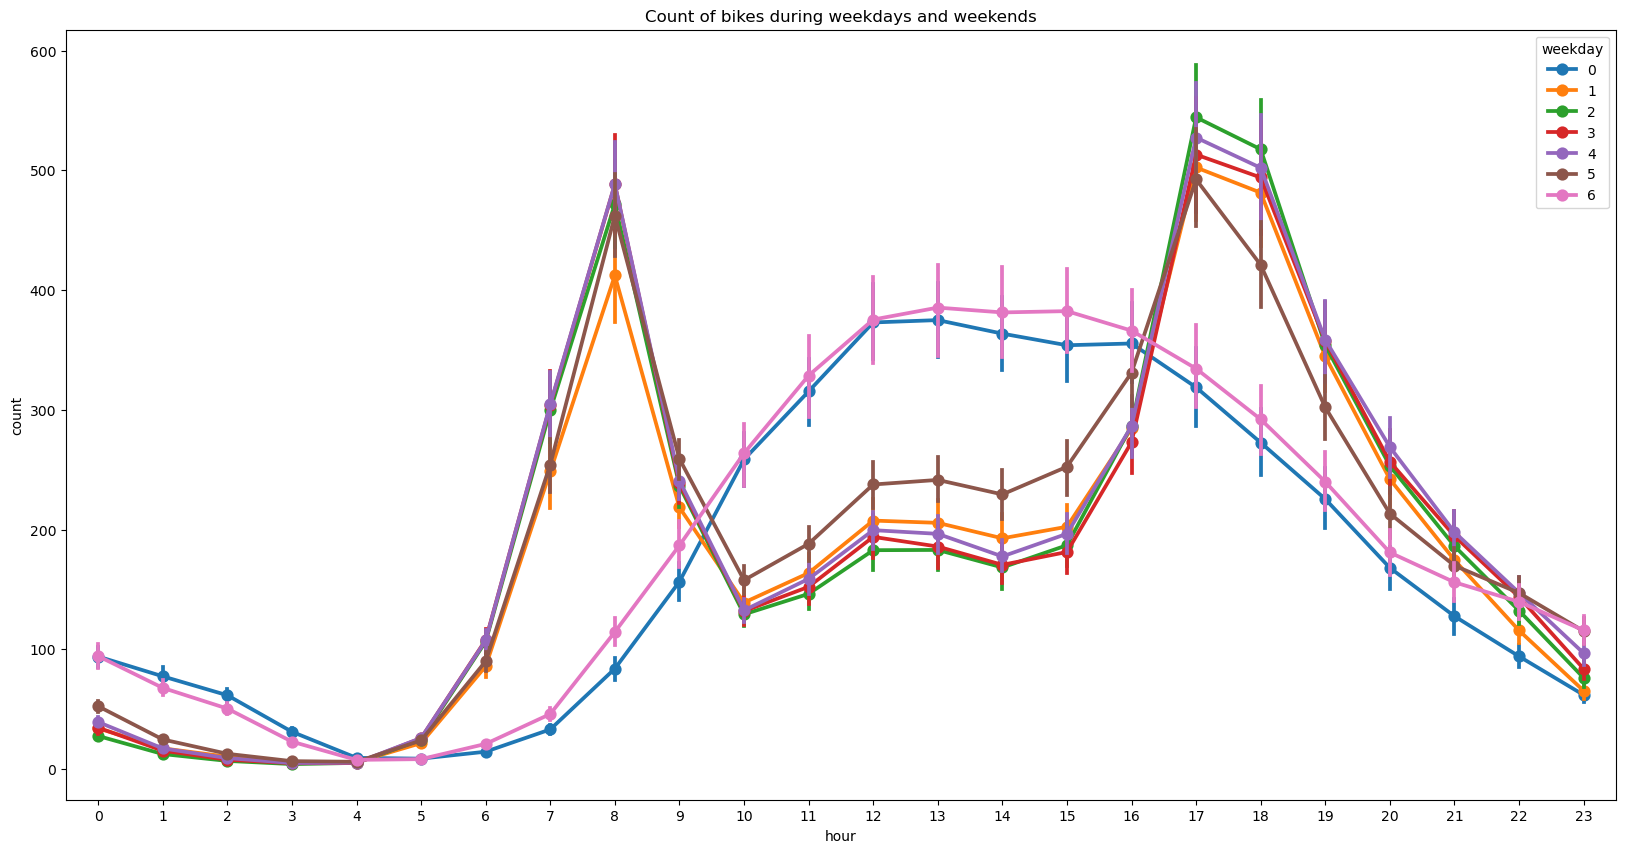

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_data, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
#On weekdays, we observe a peak in the morning hours and in the evening.
#On weekends, the peak value is in the afternoon.

In [14]:
#check Count of bikes during weekdays and weekends: Registered users.
#using point plot.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

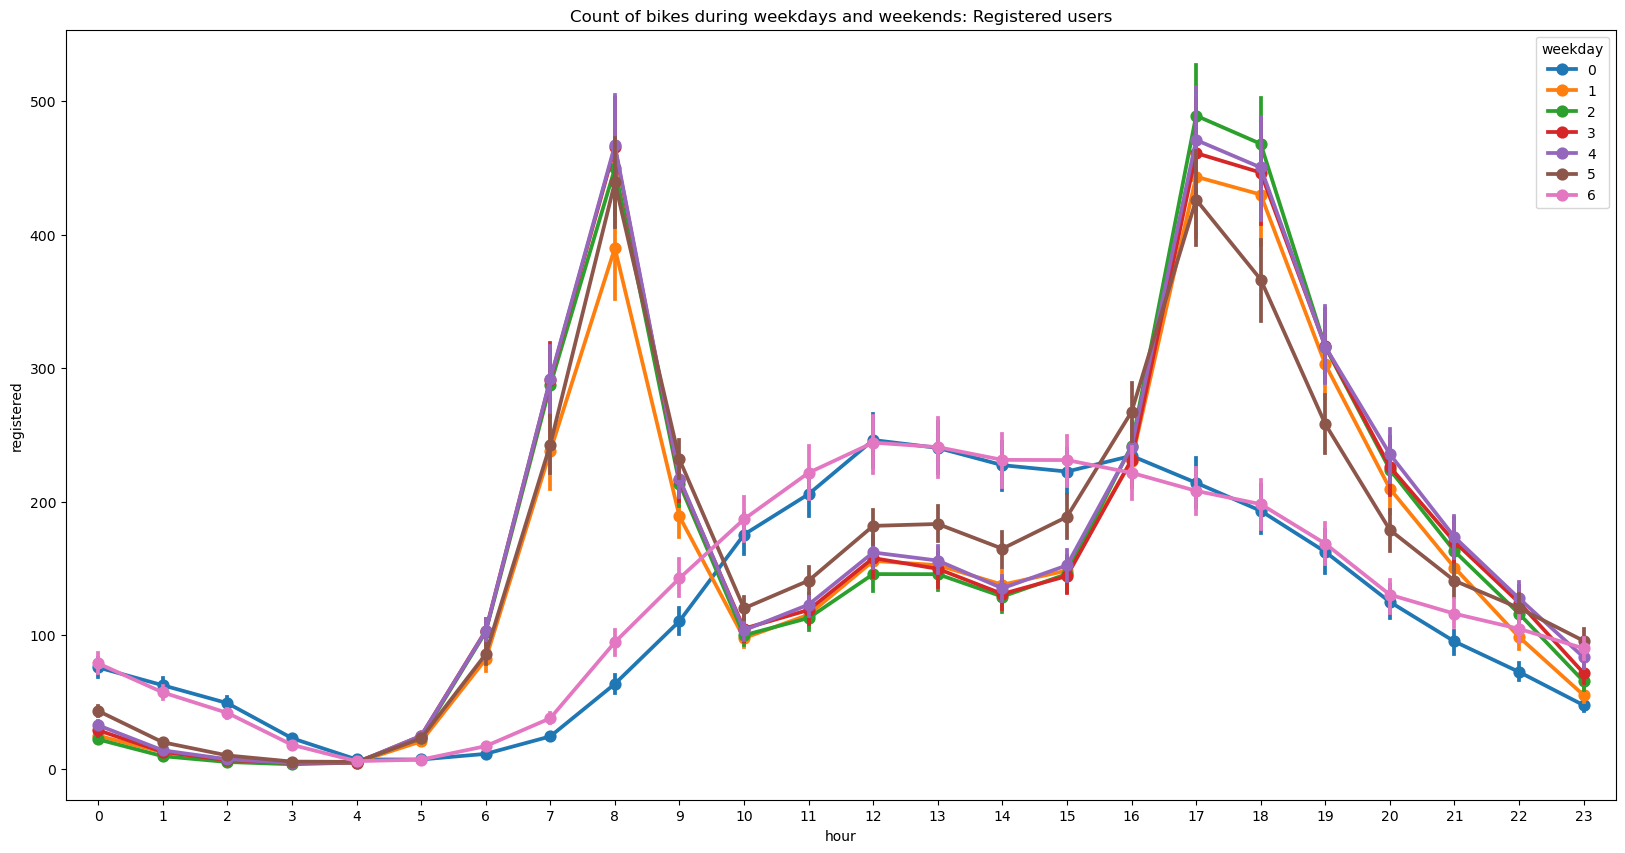

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_data, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')
#The graph shows the count of registered users throughout the week.
#This data can be related to the working personnel.

In [16]:
#check Count of bikes during different weathers
#pointplot

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

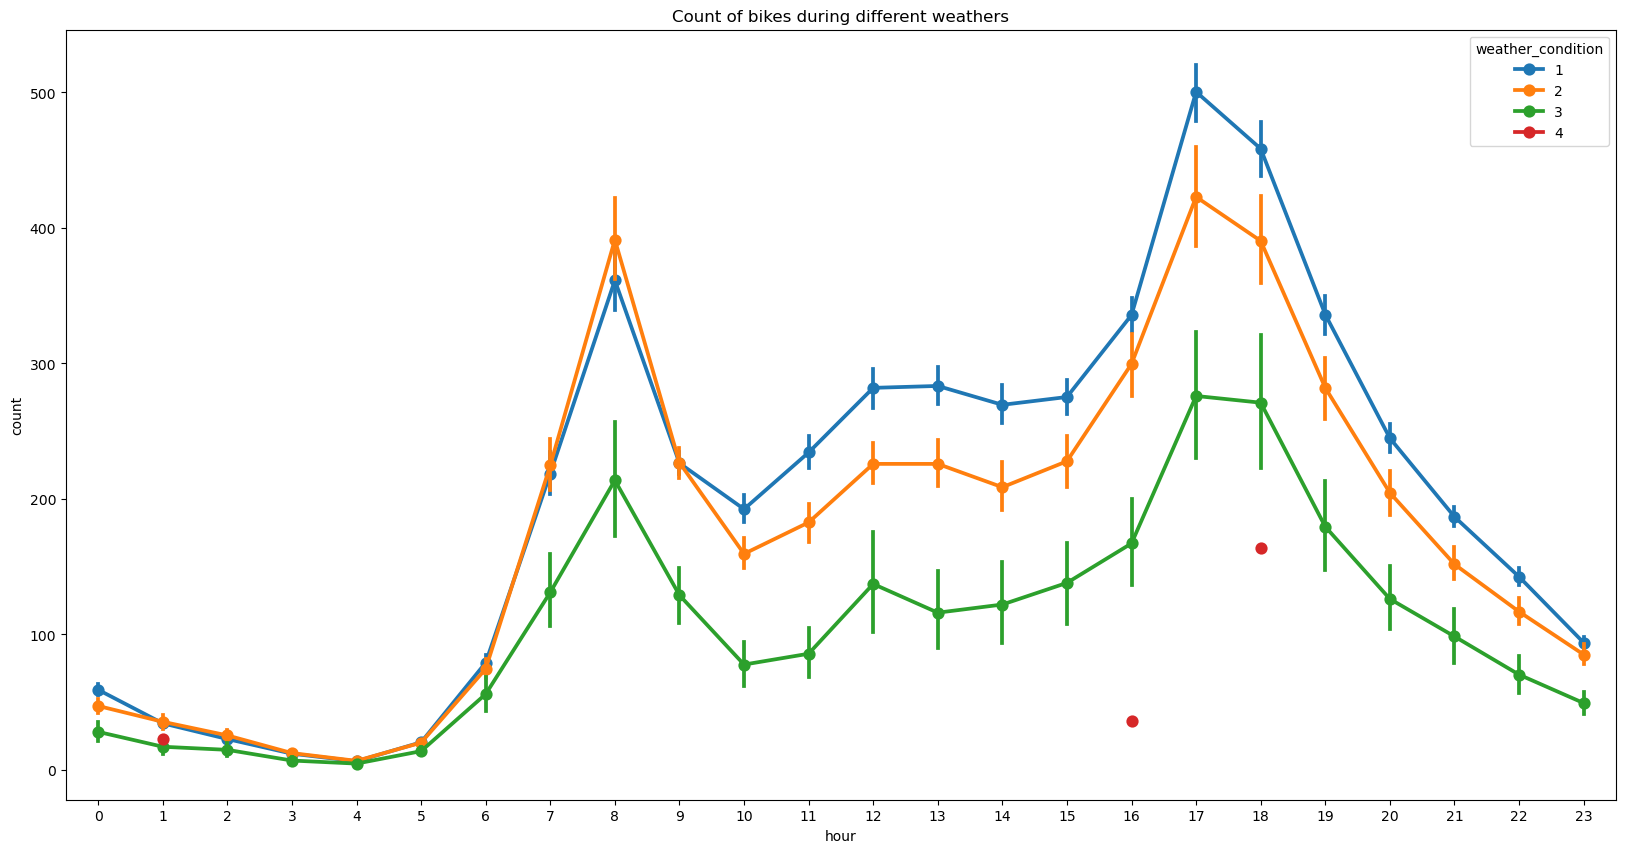

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_data, x='hour', y='count', hue='weather_condition', ax=ax)
ax.set(title='Count of bikes during different weathers')
#Weather 4 with the color dark purple  indicate rain, where no users book the bike.

In [18]:
#check counts of bike during different months.
#using bar plot.

[Text(0.5, 1.0, 'Count of bikes during different months')]

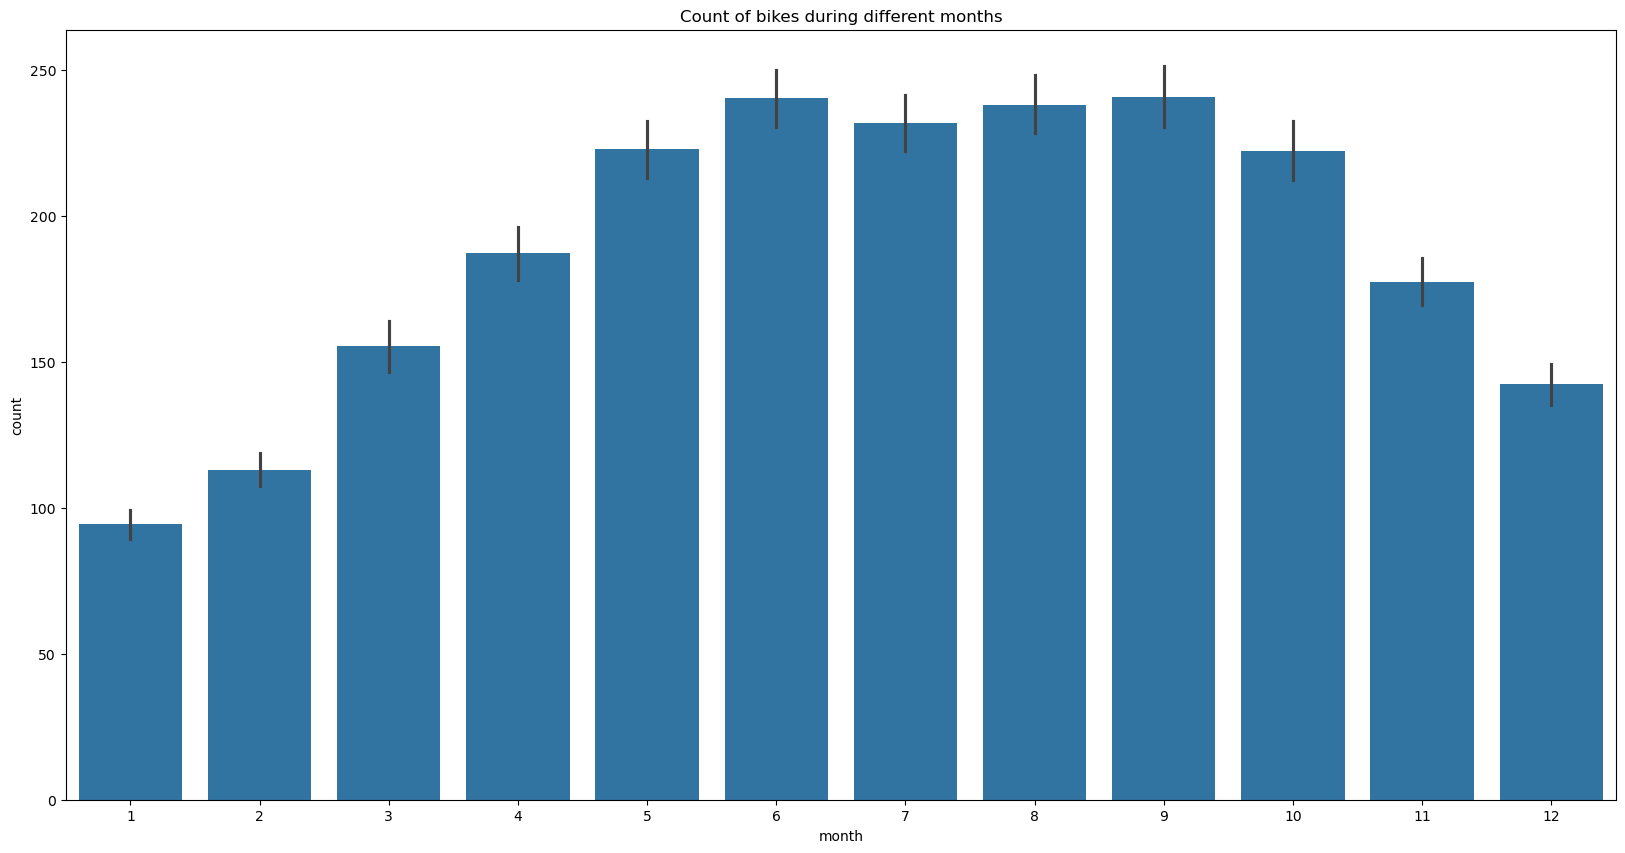

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hour_data, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')
#Over a period of time, the number of users increases and gradually, the number of users decreases.

In [20]:
#Monthly distribution of counts
#using bar plot.

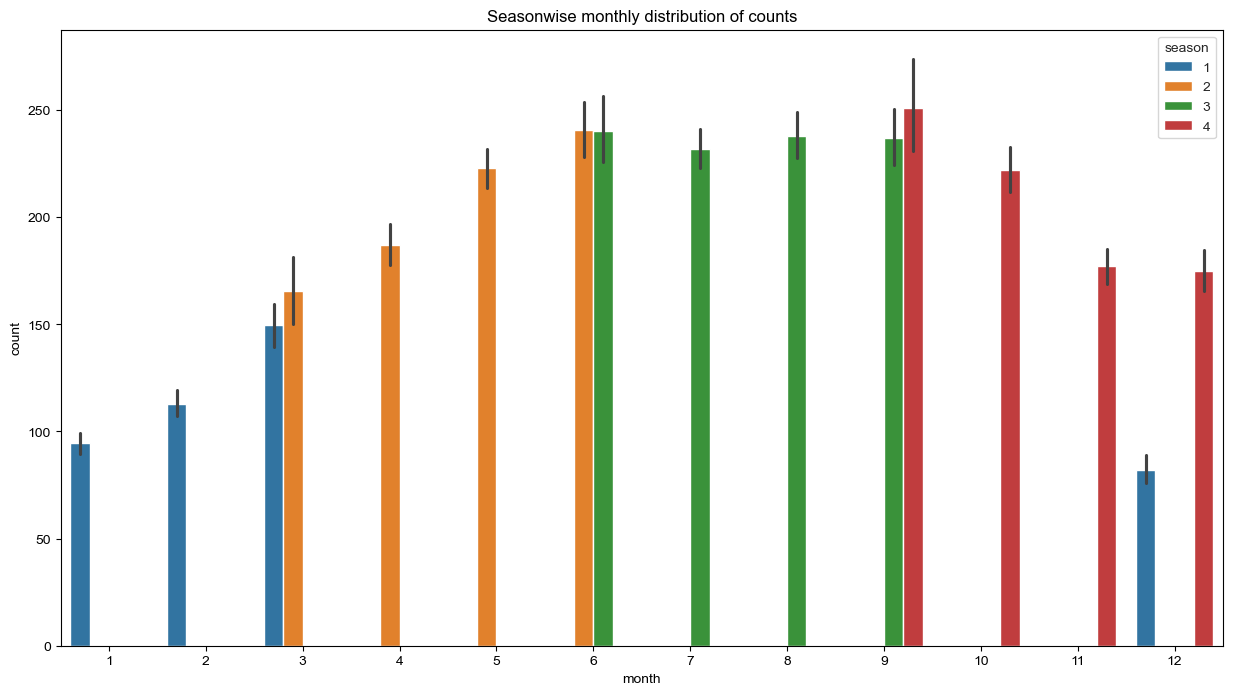

In [21]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='count',data=hour_data[['month','count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#From the above plots, we observed that increasing the bike rental count in spring and summer season and then decreasing the bike rental count in fall and winter season.
#season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

In [22]:
#check Yearly wise distribution of counts 
#using Violin plot

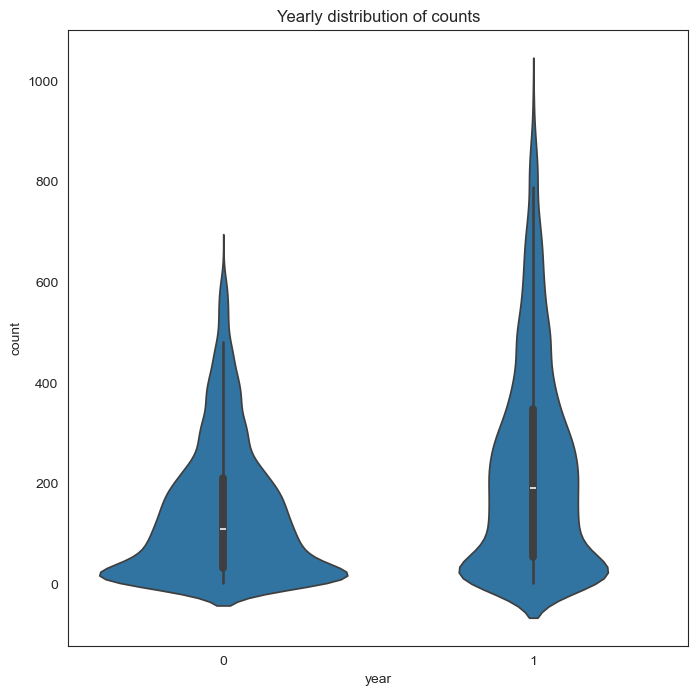

In [23]:
fig,ax=plt.subplots(figsize=(8,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='count',data=hour_data[['year','count']])
ax.set_title('Yearly distribution of counts')
plt.show()
#we can observe using this plot  bike rental count distribution is highest in year 2012 then in year 2011.
# 0-> 2011 ,1-> 2012

In [24]:
#check Holiday wise distribution of counts
#using barplot

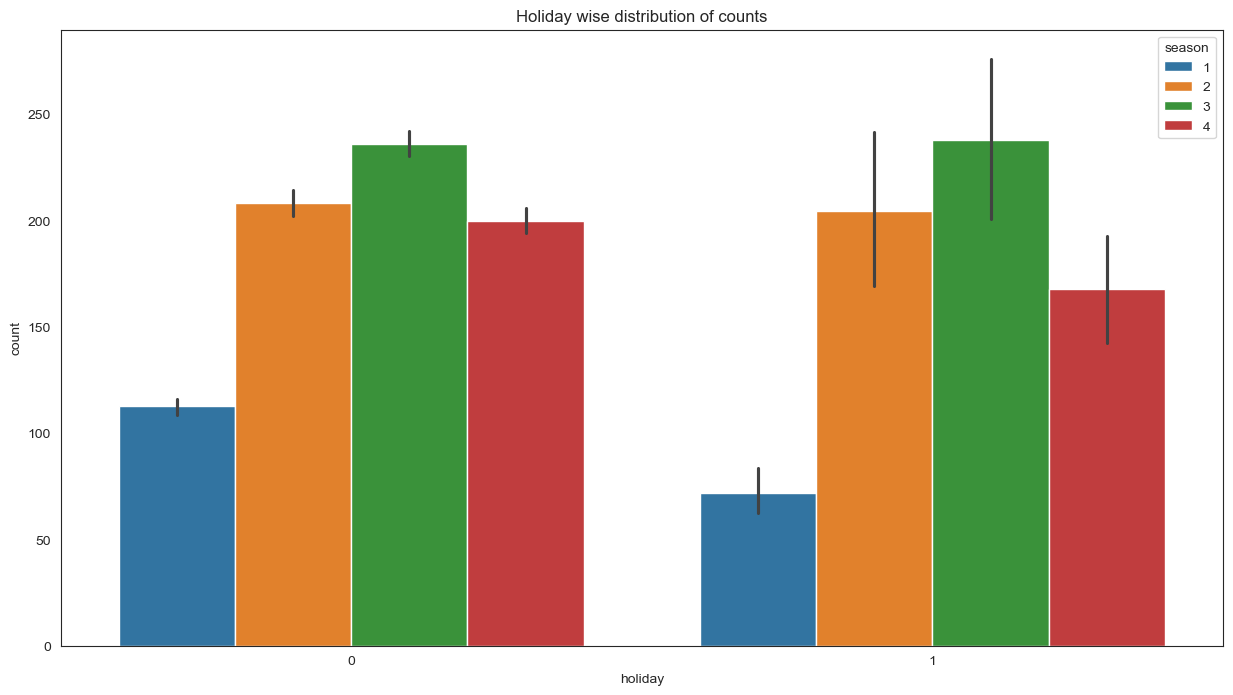

In [25]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=hour_data,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()
# using this plot we can observe that during no holiday we have highest rental count as compare to  holiday.here 0->no holiday ,1->holiday

In [26]:
#Weekday wise distribution of counts.
#using bar plot.

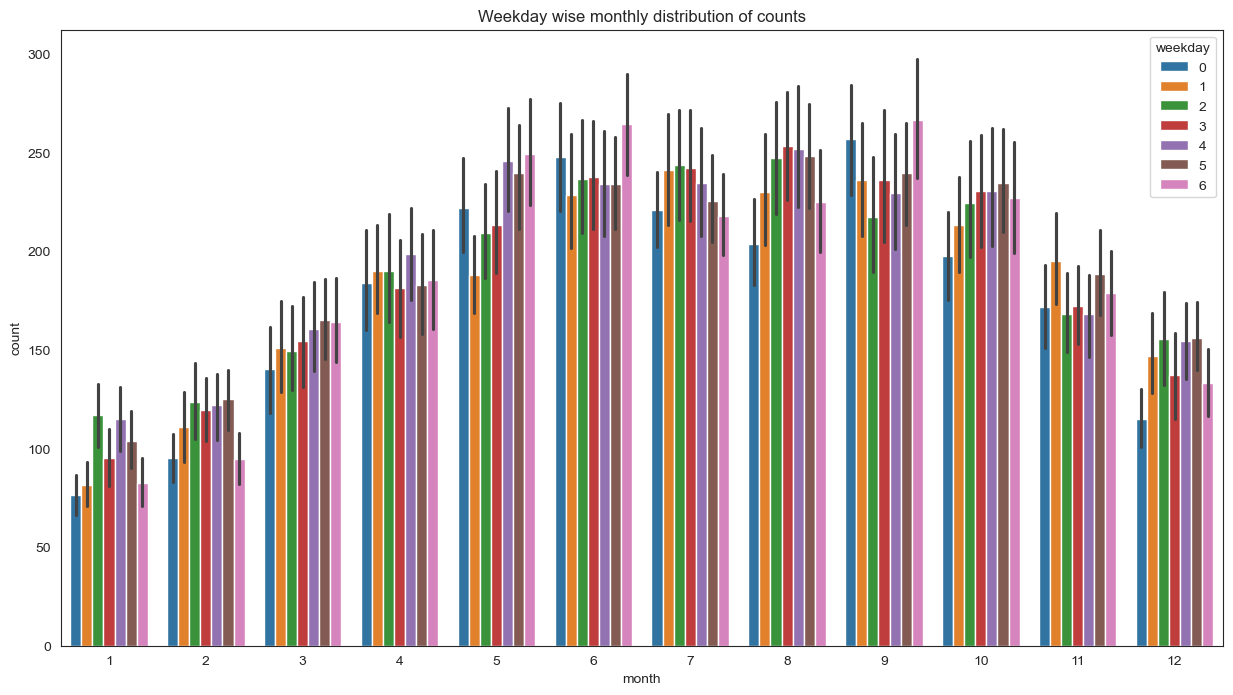

In [27]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='count',data=hour_data[['month','count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

In [28]:
#Workingday wise distribution of counts.
#using bar plot.

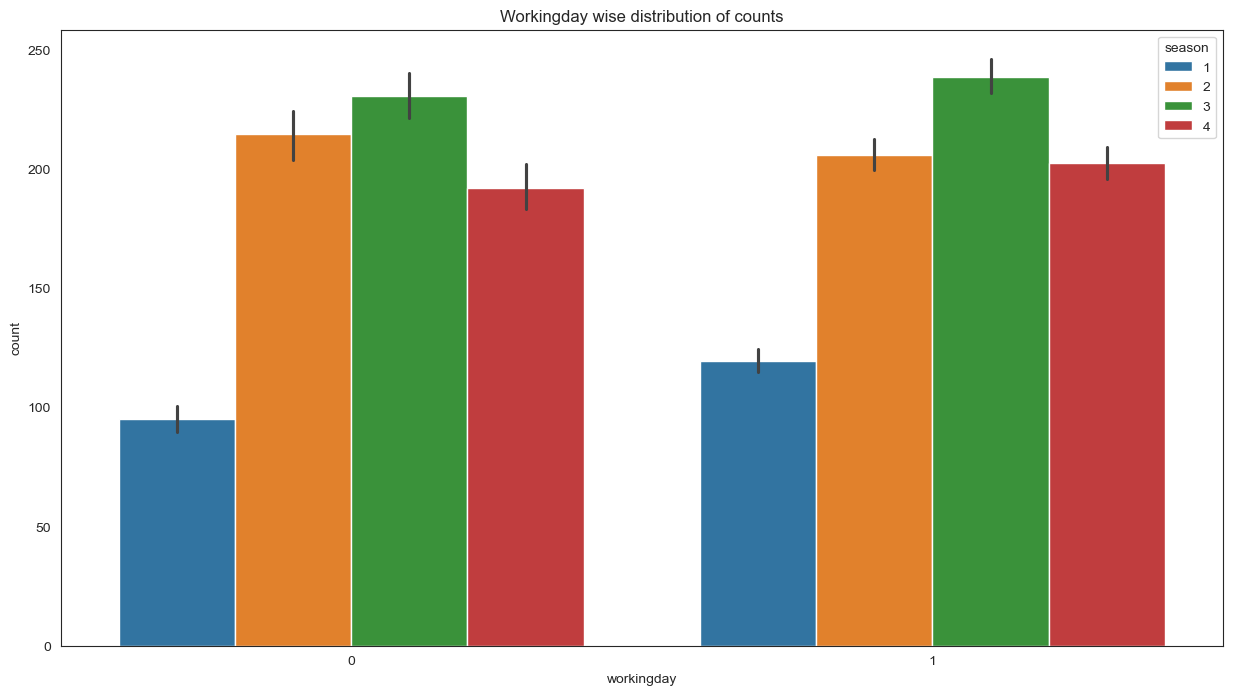

In [29]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=hour_data,x='workingday',y='count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()
#From the bar plot we can observed that during workingday the bike rental counts is  highest compared to during no workingday for different seasons.
# 0-> No workingday, 1-> workingday

In [30]:
# Weather_condition distribution of counts
# using bar plot

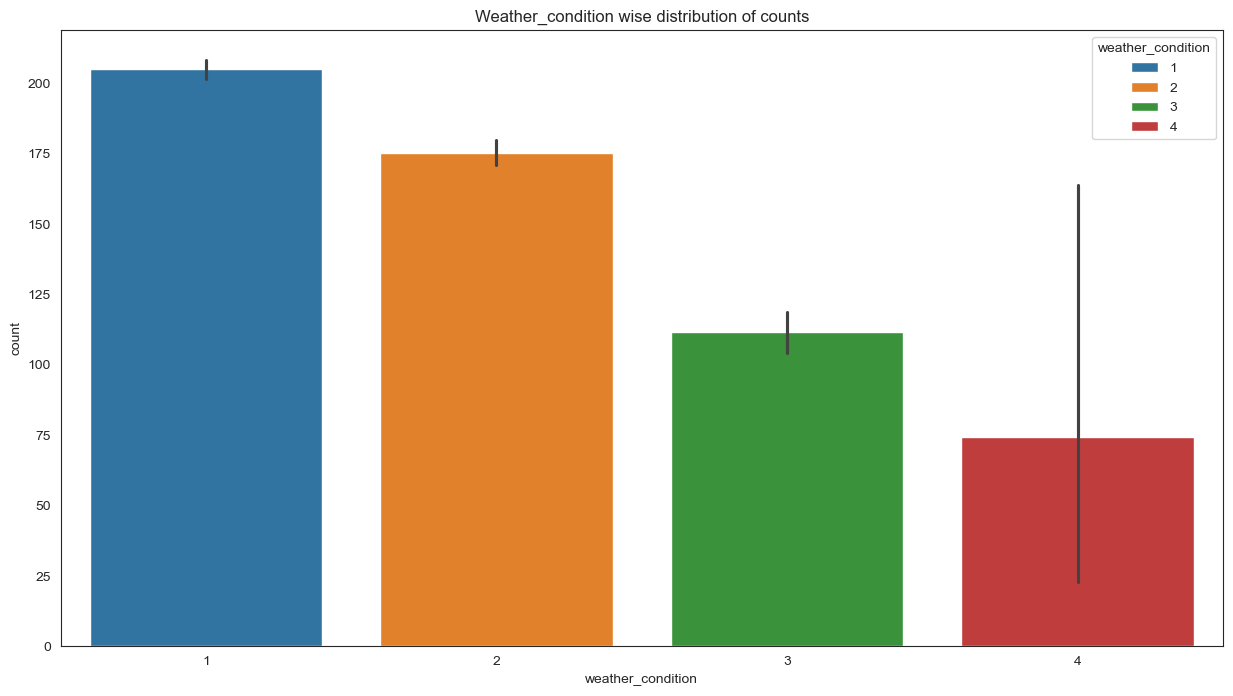

In [31]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='count',data=hour_data[['count','weather_condition']],ax=ax1,hue='weather_condition')
ax1.set_title('Weather_condition wise distribution of counts')
plt.show()
#From the bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and  third highest during light snow and light rain weather.

In [32]:
#checking outliers for count col.

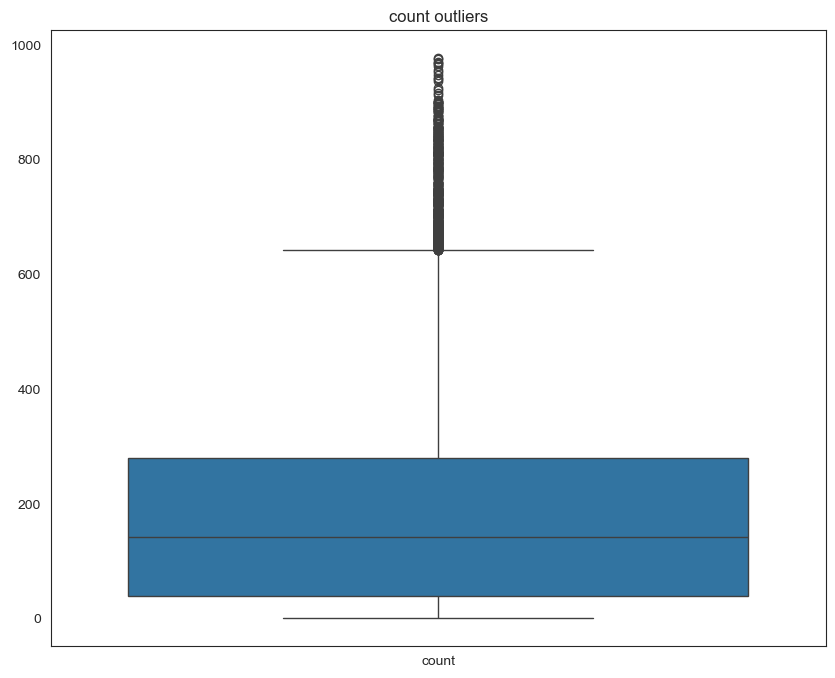

In [33]:
fig,ax=plt.subplots(figsize=(10,8))
#Boxplot for total_count outliers
sns.boxplot(data=hour_data[['count']])
ax.set_title('count outliers')
plt.show()
#most of the value lies between 0 to 600.
#some outlier present for count cols.
#need to handle in data preproccesing part.

[Text(0.5, 1.0, 'Theoretical quantiles')]

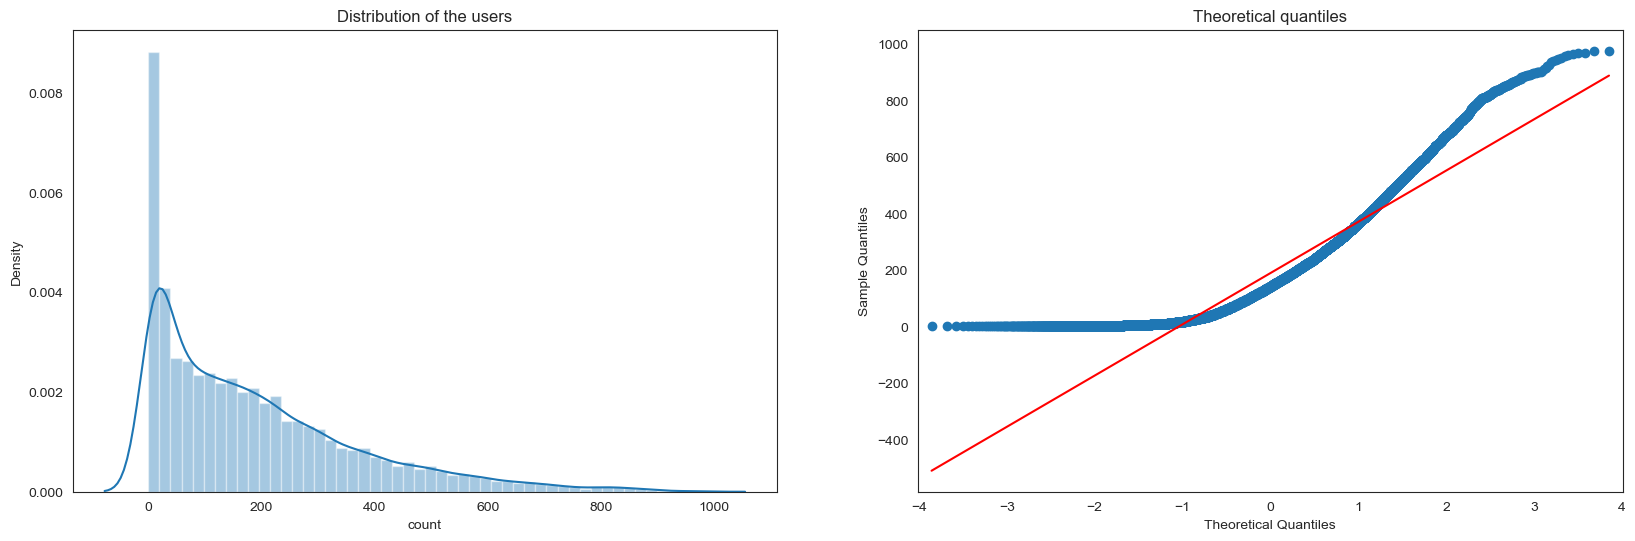

In [34]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(hour_data['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(hour_data['count'], ax=ax2, line='s')
ax2.set(title='Theoretical quantiles')
#data is not follow normal distribution.
#we need to perform transformation in datapreprossing.

In [35]:
#check outlier for temp,windspeed,humidity cols.

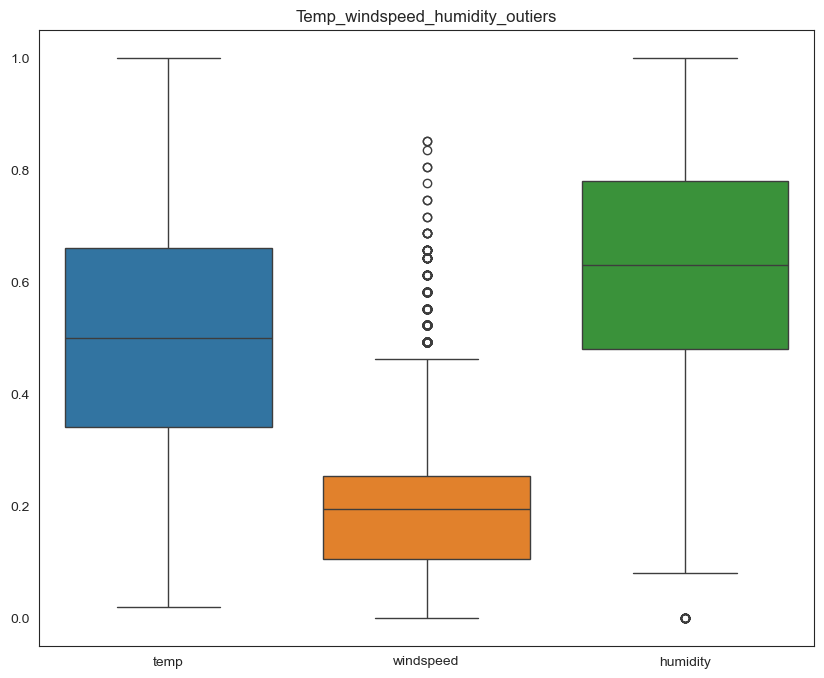

In [36]:
fig,ax=plt.subplots(figsize=(10,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=hour_data[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()
#some outlier present for windspeed and humidity we need to handle.

<Axes: xlabel='weather_condition', ylabel='count'>

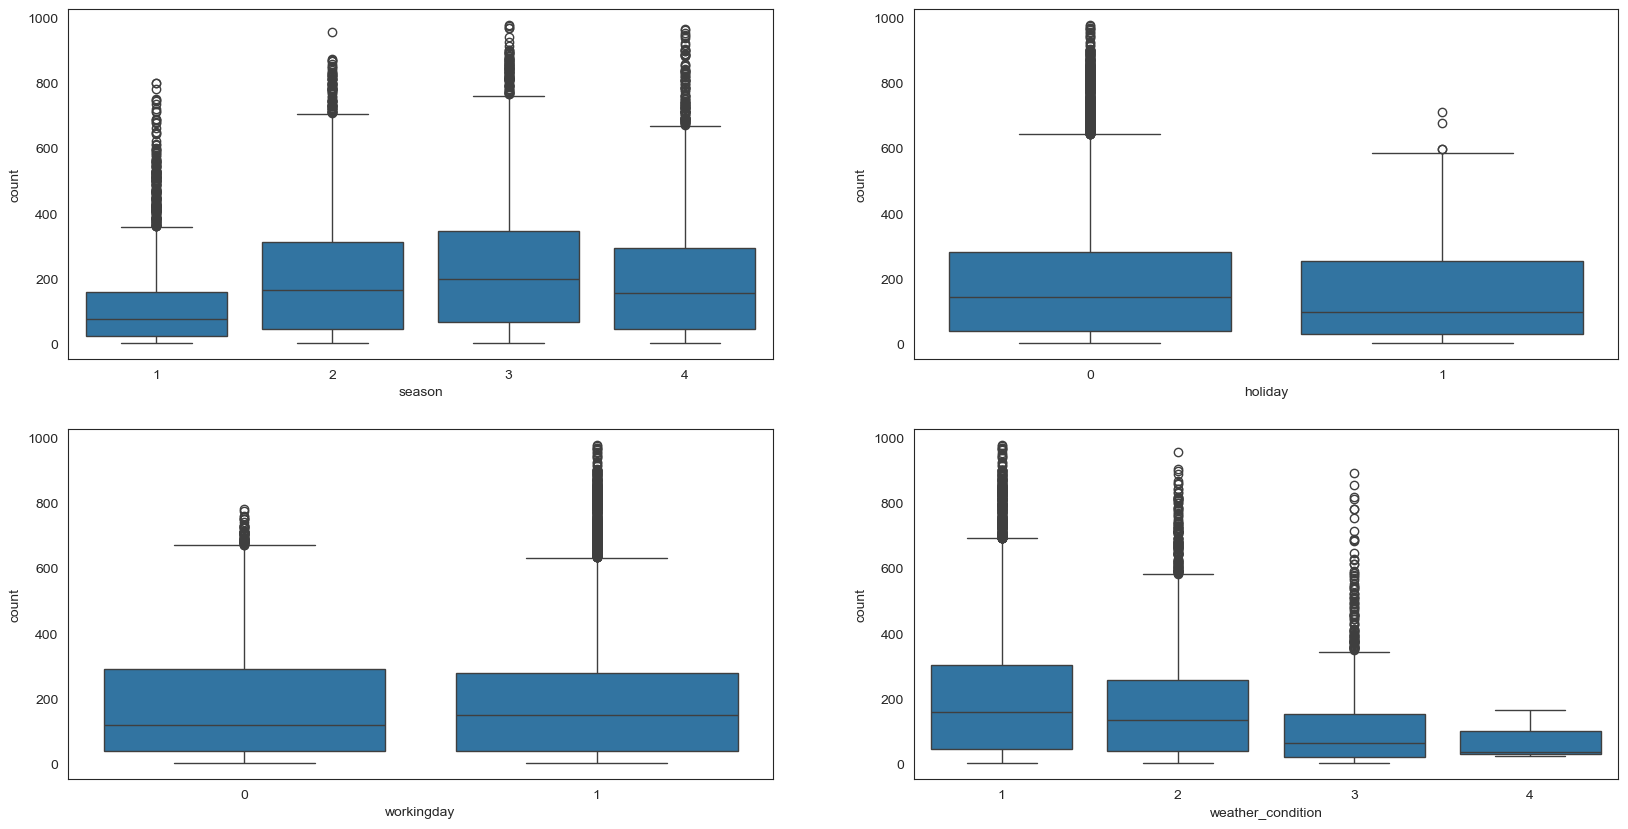

In [37]:
#box plot for categorical cols
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.boxplot(data=hour_data,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=hour_data,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=hour_data,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=hour_data,y='count',x='weather_condition',ax=axes[1][1])
#some outlier is present.

<Axes: xlabel='temp', ylabel='count'>

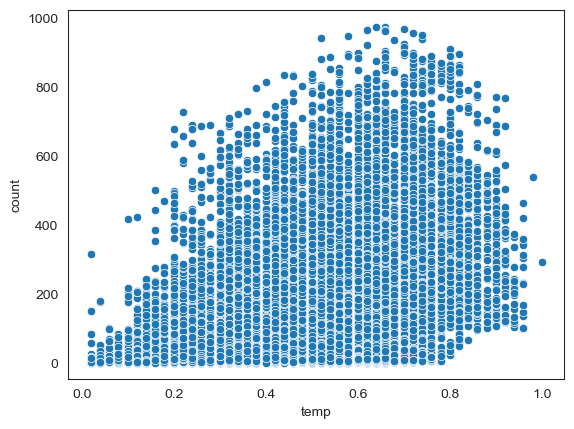

In [38]:
#check relationship between temp and count col.
sns.scatterplot(data=hour_data,x='temp',y='count')

<Axes: xlabel='humidity', ylabel='count'>

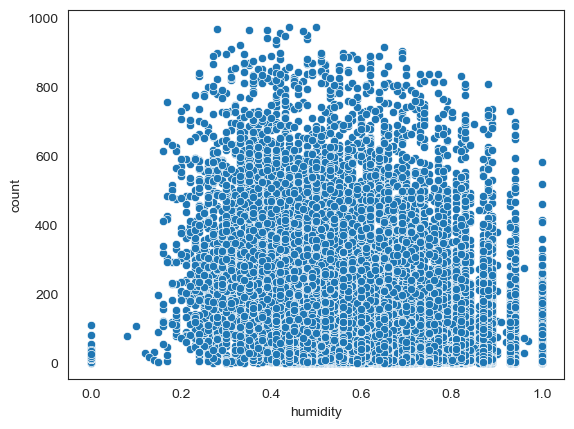

In [39]:
#check relationship between humidity and count col.
sns.scatterplot(data=hour_data,x='humidity',y='count')
#some outlier present in humidity cols.

<Axes: xlabel='windspeed', ylabel='count'>

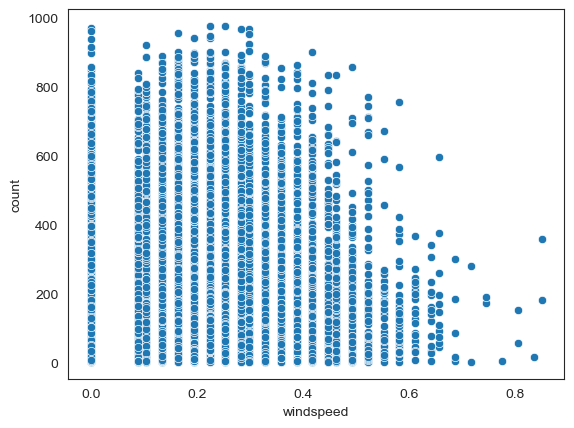

In [40]:
#check relationship between windspeed and count col.
sns.scatterplot(data=hour_data,x='windspeed',y='count')
#outlier is present.

In [41]:
# Regression plot of temperature and humidity with respect to count.
# using regplot.

[Text(0.5, 1.0, 'Relation between humidity and users')]

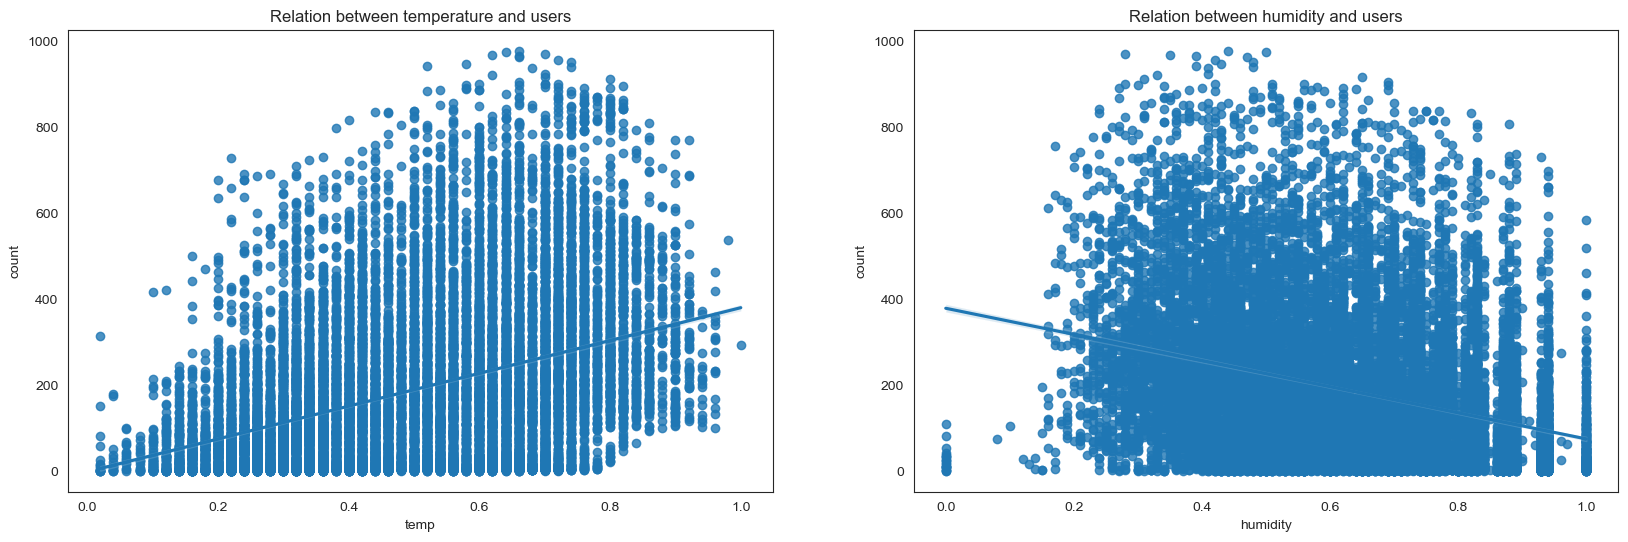

In [42]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=hour_data['temp'], y=hour_data['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=hour_data['humidity'], y=hour_data['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")
#if temp  increases no of users increases.
#if humidity increases no of user decreases.

In [43]:
#using heatmap we can check corelation between features.
# we use heatmap for numerical cols.

<Axes: >

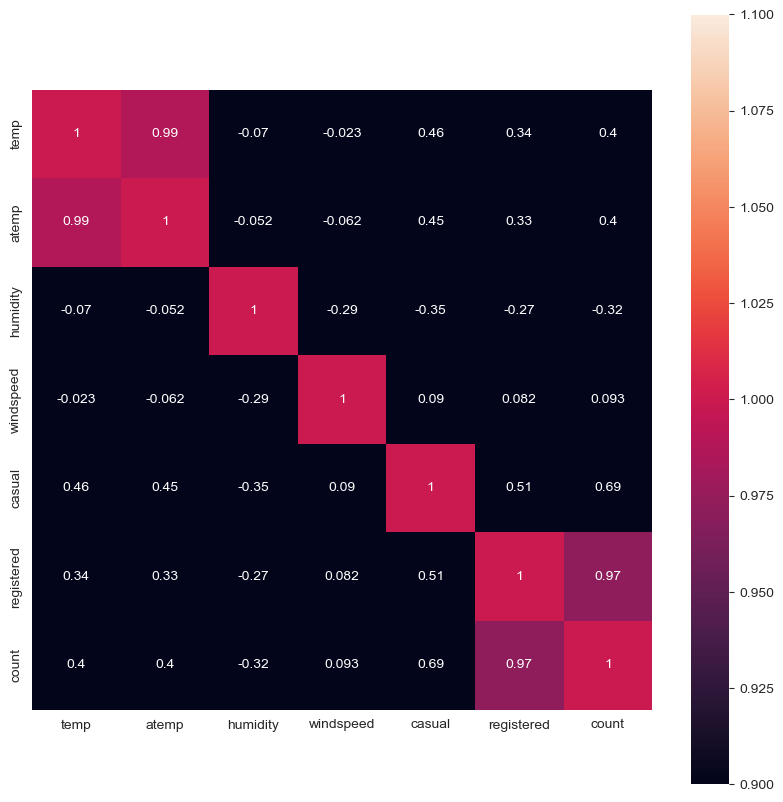

In [44]:
#check corelation
plt.figure(figsize=(10,10))
sns.heatmap(hour_data[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr('pearson'),vmin=1,vmax=1,annot=True,square=True,)
#we can observed that some features are positively correlated or some are negatively correlated to each other. 
#The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.
#The count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.
# atemp,casual and registered column need to remove in features selection part.

In [45]:
#create copy of dataset before processing.
df_hour=hour_data.copy()

# Data Preprocessing

## step 1 check for null values and duplicates.

In [46]:
#check for null values.
df_hour.isnull().sum()
#no null values is present.
#Handle duplicates.
df_hour.drop_duplicates(inplace=True)

## step 2 Check for categorical cols.

In [47]:
df_hour.info()
#id,datetime,causal and registered cols is no longer use so we will drop in feature selection part.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 17379 non-null  int64   
 1   datetime           17379 non-null  object  
 2   season             17379 non-null  category
 3   year               17379 non-null  int64   
 4   month              17379 non-null  category
 5   hour               17379 non-null  category
 6   holiday            17379 non-null  category
 7   weekday            17379 non-null  category
 8   workingday         17379 non-null  category
 9   weather_condition  17379 non-null  category
 10  temp               17379 non-null  float64 
 11  atemp              17379 non-null  float64 
 12  humidity           17379 non-null  float64 
 13  windspeed          17379 non-null  float64 
 14  casual             17379 non-null  int64   
 15  registered         17379 non-null  int64   
 16  coun

## step 3 Apply transformation for count column.

In [48]:
df_hour['count'] = np.log(df_hour['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

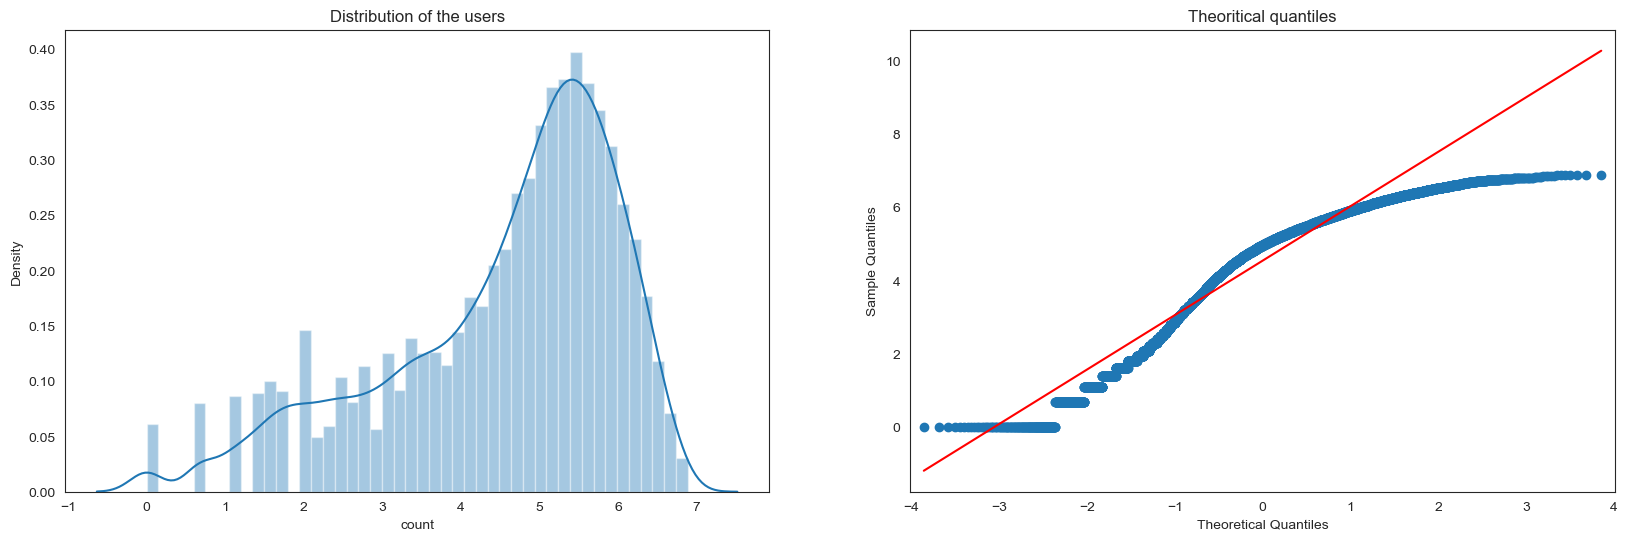

In [49]:
#check for distribution.
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df_hour['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df_hour['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')
#Now the distribution is more uniform, meaning the data was converted accordingly.
#Now the data in the theoretical quantiles is very similar to the red line.

## step 4 Perform scaling of data

In [50]:
#Using MinMax scaler.
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['temp','humidity','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [51]:
df_hour=scaling(df_hour)
df_hour.head()

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.0,3,13,2.772589
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.0,8,32,3.688879
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.0,5,27,3.465736
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.0,3,10,2.564949
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.0,0,1,0.000000


## step 5 Outlier handling

## Z-score method


In [52]:
#find limit
#windspeed col.
upper_limit=df_hour['windspeed'].mean()+3*df_hour['windspeed'].std()
lower_limit=df_hour['windspeed'].mean()-3*df_hour['windspeed'].std()
print(upper_limit)
print(lower_limit)


0.6548939602972159
-0.20797352699179253


In [53]:
#find outlier
df_hour.loc[(df_hour['windspeed']>upper_limit)|(df_hour['windspeed']<lower_limit)]

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.183673,0.1515,0.47,0.684260,3,52,4.007333
467,468,2011-01-21,1,0,1,12,0,5,1,1,0.204082,0.1818,0.27,0.684260,11,67,4.356709
468,469,2011-01-21,1,0,1,13,0,5,1,1,0.183673,0.1515,0.21,0.684260,8,65,4.290459
870,871,2011-02-08,1,0,2,17,0,2,1,1,0.204082,0.1818,0.32,0.684260,4,172,5.170484
1007,1008,2011-02-14,1,0,2,15,0,1,1,1,0.551020,0.5303,0.21,0.771953,19,71,4.499810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17153,17154,2012-12-22,1,1,12,12,0,6,0,1,0.285714,0.2576,0.36,0.771953,18,128,4.983607
17156,17157,2012-12-22,1,1,12,15,0,6,0,1,0.306122,0.2727,0.33,0.684260,14,139,5.030438
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.244898,0.2121,0.41,0.684260,31,91,4.804021
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.265306,0.2273,0.36,0.684260,47,97,4.969813


In [54]:
#triming-delete the outlier data
#new_day_data=day_data.loc[(day_data['windspeed']<upper_limit) & (day_data['windspeed']>lower_limit)]
#capping-change the outlier value to upper and lower limit value
df_hour.loc[(df_hour['windspeed']>upper_limit),'windspeed']=upper_limit
df_hour.loc[(df_hour['windspeed']<lower_limit),'windspeed']=lower_limit


<Axes: ylabel='windspeed'>

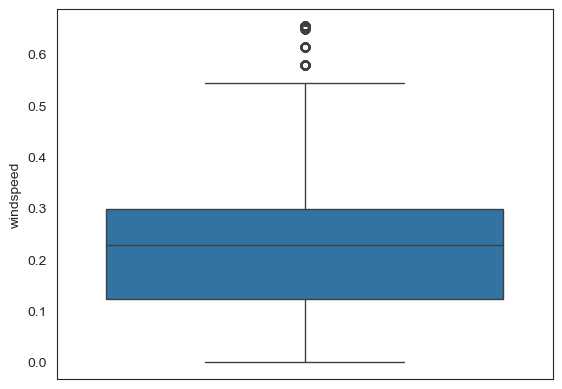

In [55]:
sns.boxplot(df_hour['windspeed'])

## IQR method

In [56]:
#humidity col.
q1=df_hour['humidity'].quantile(0.25)
q3=df_hour['humidity'].quantile(0.75)
#find IQR
iqr=q3-q1

In [57]:
iqr,q1,q3

(0.30000000000000004, 0.48, 0.78)

In [58]:
#find upper limit
upper_limit=q3+(1.5*iqr)
#find lower limit
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(1.23, 0.029999999999999916)

In [59]:
#capping the data
#capping-change the outlier value to upper and lower limit value
df_hour.loc[(df_hour['humidity']>upper_limit),'humidity']=upper_limit
df_hour.loc[(df_hour['humidity']<lower_limit),'humidity']=lower_limit

<Axes: ylabel='humidity'>

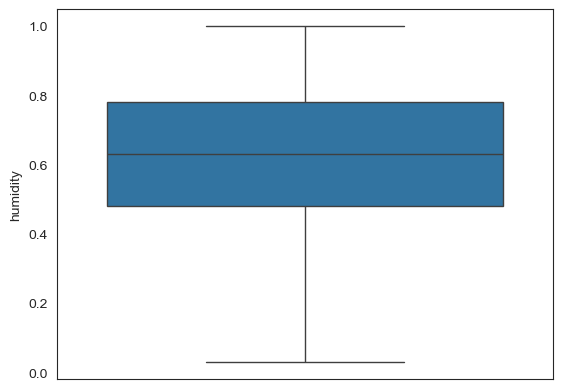

In [60]:
sns.boxplot(df_hour['humidity'])

In [61]:
#for count column.
q1=df_hour['count'].quantile(0.25)
q3=df_hour['count'].quantile(0.75)
#find IQR
iqr=q3-q1

In [62]:
iqr,q1,q3

(1.9494752152198092, 3.6888794541139363, 5.638354669333745)

In [63]:
#find upper limit
upper_limit=q3+(1.5*iqr)
#find lower limit
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(8.56256749216346, 0.7646666312842227)

In [64]:
#capping the data
#capping-change the outlier value to upper and lower limit value
df_hour.loc[(df_hour['count']>upper_limit),'count']=upper_limit
df_hour.loc[(df_hour['count']<lower_limit),'count']=lower_limit

<Axes: ylabel='count'>

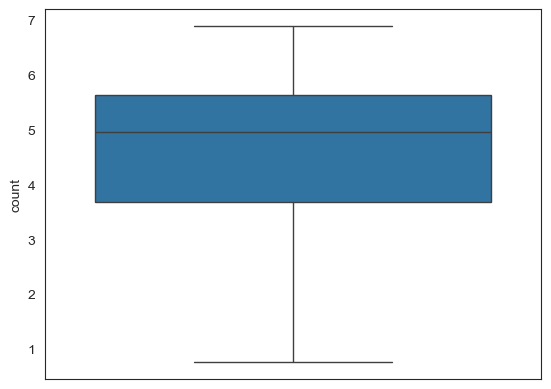

In [65]:
sns.boxplot(df_hour['count'])

In [66]:
#While using feature engineering, we need to mention the categorical column in one hot encoding.
#id,datetime,atemp,casual and registered column need to remove in features selection part.

# step 6 Feature Selection
- check for multicollearity
- drop unwanted columns
- create dependent and indepandent variables

In [68]:
df_hour.columns

Index(['id', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [77]:
#deleting unecessary col
df_hour.drop('id',axis=1,inplace=True)
df_hour.drop('datetime',axis=1,inplace=True)
df_hour.drop('atemp',axis=1,inplace=True)
df_hour.drop('casual',axis=1,inplace=True)
df_hour.drop('registered',axis=1,inplace=True)

In [79]:
#Filtering out duplicate values
df_hour[df_hour.duplicated()]

,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,count
8126,4,0,12,6,0,6,0,1,0.224490,0.65,0.122840,2.397895
13727,3,1,7,4,0,2,1,1,0.653061,0.83,0.105325,1.791759


In [78]:
df_hour.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [80]:
# Checking for duplicate rows and deleting them
df_hour.drop_duplicates(inplace=True)

<Axes: >

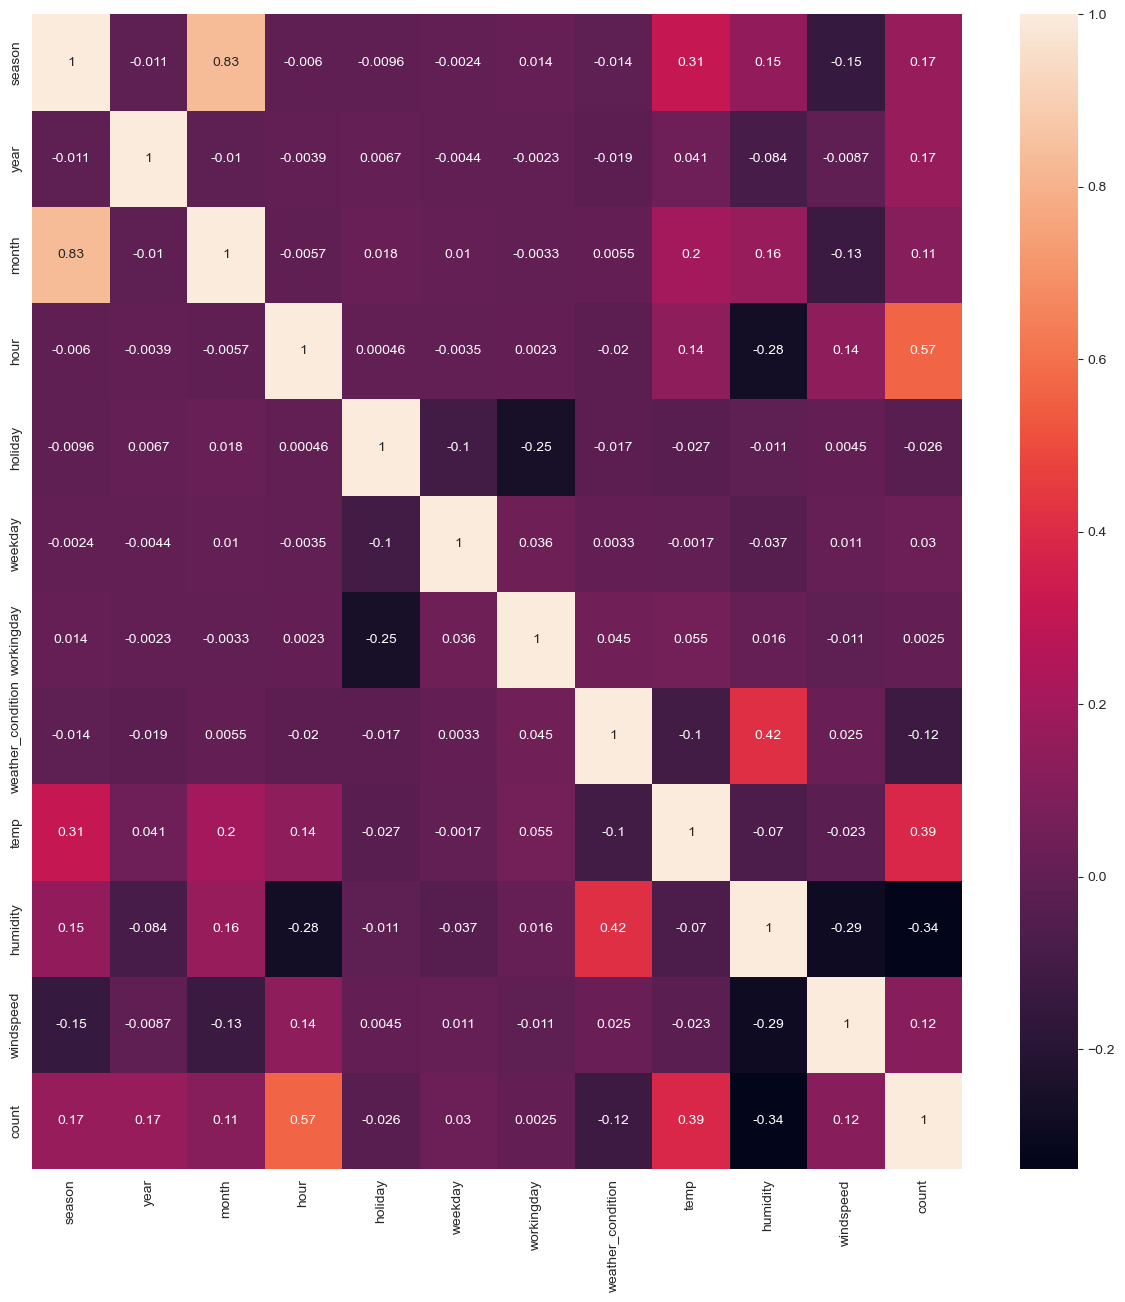

In [81]:
# Checking the correlation of the data
plt.figure(figsize=(15,15))
sns.heatmap(df_hour.corr(),annot=True)

- There are no columns where our correlation is exceding 0.90, Hence we will not delete any columns


# Feature Encoding :

In [ ]:
# One-hot encode the categorical columns
categorical_cols = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_condition']

X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Initialize and fit the XGBRegressor
xg_reg = XGBRegressor()

xg_reg.fit(X_train, y_train)

# Make predictions
pred_xg = xg_reg.predict(X_test)

# creating dependent and independent variable

In [88]:
df_hour.shape

(17377, 12)

In [96]:
#createing dependendent and independent variables
from sklearn.model_selection import train_test_split
x = df_hour.drop('count', axis=1)  
y = df_hour['count']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape

(13901, 11)

In [99]:
X_test.shape

(3476, 11)

# Model selection and building
- Create different models and choose best fit 

# Define Metric(RMSLE)

In [139]:
import numpy as np

def rmsle(y, pred):
    log_y = np.log1p(y)           # Use np.log1p for natural log of (y + 1)
    log_pred = np.log1p(pred)     # Use np.log1p for natural log of (pred + 1)
    
    squared_error = (log_y - log_pred) ** 2  # Calculate squared errors
    
    rmsle_value = np.sqrt(np.mean(squared_error))  # Compute RMSLE
    return rmsle_value  # Return the calculated RMSLE

In [140]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [141]:
#creating function which evaluates regressor and its functions
from sklearn.model_selection import GridSearchCV
import numpy as np

def evaluate(reg_cls, params=None):
    reg = reg_cls()
    
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)  # Fixed here
    
    reg.fit(X_train, y_train)  # Fit the model on training data
    pred = reg.predict(X_test)  # Make predictions on test data
    
    y_test_exp = np.expm1(y_test)  # Exponentially transform the true values
    pred_exp = np.expm1(pred)        # Exponentially transform the predictions
    
    print('\n', reg_cls)
    
    if params:
        print(reg.best_params_)  # Print the best parameters found
        reg = reg.best_estimator_  # Get the best estimator from GridSearchCV
    
    print(rmsle(y_test_exp, pred_exp))  # Print the RMSLE (Root Mean Squared Log Error)
    
    return reg, pred_exp  # Return the fitted model and predictions

In [146]:
params = {'n_estimators': [100 * i for i in range(1, 6)]}

# Evaluate models
lr_reg, pred_lr = evaluate(LinearRegression)  # No params
rg_reg, pred_rg = evaluate(Ridge)              # No params
ls_reg, pred_ls = evaluate(Lasso)              # No params
rf_reg, pred_rf = evaluate(RandomForestRegressor)  # No params
gb_reg, pred_gb = evaluate(GradientBoostingRegressor)  # No params

# Evaluate XGBRegressor with params
xg_reg, pred_xg = evaluate(XGBRegressor, params)

# Evaluate LGBMRegressor (no params)
lg_reg, pred_lg = evaluate(LGBMRegressor)


 <class 'sklearn.linear_model._base.LinearRegression'>
0.6220331385310199

 <class 'sklearn.linear_model._ridge.Ridge'>
0.6219834603633677

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.452069694616146

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.350681431379766

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.5103481196852742

 <class 'xgboost.sklearn.XGBRegressor'>
0.33375977373970467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 13901, number of used features: 58
[LightGBM] [Info] Start training from score 4.546879

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.32981027476130037

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 200}
0.3318896905578967
[LightGBM] [Info]

# As we can see model LGMRegressor has lowest error hence we are evaluating with LGMRegressor model